## Input the cleaned dataset

In [2]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame
from pandas.tools.plotting import scatter_matrix

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')

# Import the csv files and seperate at , 
cleanedResponses = "data/cleaned-version.csv"
cleanedDf = pd.read_csv(cleanedResponses, sep=',')

responses = "data/responses.csv"
df = pd.read_csv(responses, sep=',')

music = cleanedDf.iloc[:,1:19]
personal = df.iloc[:,140:150]
interests = cleanedDf.iloc[:,31:63]

## Data exploration

After first trying to visualise the whole dataset, I quickly realised that this would not be the best way. I simply have too many features for this. <br> So I decided to focus on the different segments. I started with the music dataframe. <br> 


### 1. Music Genre preferences

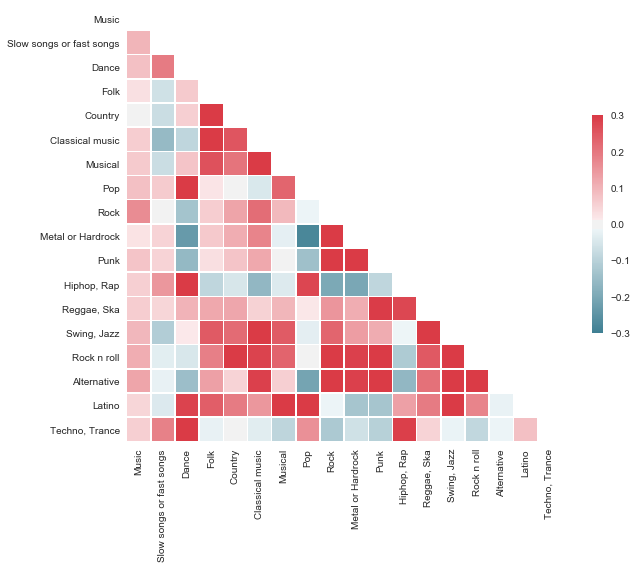

In [6]:
## use the corr() to find correlations in columns
correlations = music.corr()

def get_music_corrs(df):
    col_correlations = music.corr()
    col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
    cor_pairs = col_correlations.stack()
    return cor_pairs.to_dict()

music_corrs = get_music_corrs(music)
music_corrs

## create a heatmap to show correlation
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 8))
cmap = sb.diverging_palette(220, 10, as_cmap=True)
_ = sb.heatmap(correlations, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [8]:
music_enjoyment = music["Music"]
music.drop(["Music"], axis=1, inplace=True)

music_speed = music["Slow songs or fast songs"]
music.drop(["Slow songs or fast songs"], axis=1, inplace=True)

# create dictionary mapping genre to popularity
def get_popularity(df, genres):
    pop = {}
    for i in genres:
        pop[i] = df[i].sum()/len(df.index)
    sorted_popularity = dict(sorted(pop.items(), key=lambda x: x[1]))
    return sorted_popularity

genres = music.columns.tolist()

genre_pop = get_popularity(music, genres)

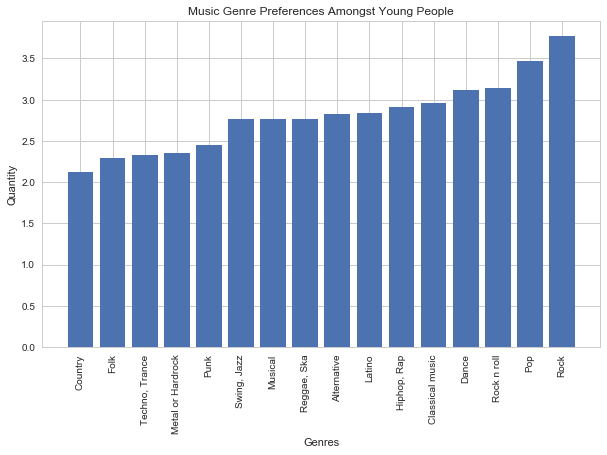

In [9]:
genres = music.columns.tolist()
genre_pop = get_popularity(music, genres)

fig, ax = plt.subplots(figsize=(10,6))

# d = plt.figure(figsize=(10, 5))
plt.bar(range(len(genre_pop)), genre_pop.values(), align='center')
plt.xticks(range(len(genre_pop)), genre_pop.keys(), rotation="vertical")

ax.set_title("Music Genre Preferences Amongst Young People")
ax.set_xlabel("Genres")
ax.set_ylabel("Quantity")
plt.show()

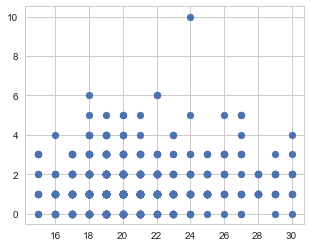

In [25]:
music.head()
personal.describe()

x = personal['Age']
y = personal['Number of siblings']

plt.scatter(x, y)
plt.show()